In [7]:
# !pip install sweetviz

In [155]:
import numpy as np
import pandas as pd
import json 
import gc 
import copy
from tqdm import tqdm
import random
import sklearn
import sweetviz
import pickle
import gzip
import pickle
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#sns.set() # setting seaborn default for plots
import matplotlib.font_manager as fm
import scipy.stats  as stats

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

# 기본 설정 읽기

# size, family
print('# 설정 되어있는 폰트 사이즈')
print (plt.rcParams['font.size'] ) 
print('# 설정 되어있는 폰트 글꼴')
print (plt.rcParams['font.family'] )


font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
font_list

f = [f.name for f in fm.fontManager.ttflist]
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Malgun' in f.name]

font_path = 'C:\\Windows\\Fonts\\malgun.ttf'

font_name = fm.FontProperties(fname=font_path).get_name()
 
#font 설정
mpl.rc('font',family=font_name)
print(plt.rcParams['font.family'])
#plt.rc('font', family='NanumGothic') # For Windows

# 설정 되어있는 폰트 사이즈
10.0
# 설정 되어있는 폰트 글꼴
['Malgun Gothic']
['Malgun Gothic']


## 데이터중 30000건만 랜덤샘플링 

In [157]:
# file_path = "./"
# file_name = "lol_kr_v1018_soloRank.json"

# df=pd.DataFrame()
# lst_playernum_count=[]    # 게임에 참여한 플레이어 수 (따로 추가)

# with open(file_path+file_name, 'r', encoding='utf-8-sig') as f: #파일을 열어서 읽기 : r 
#     for line in f:  #파일을 열어서 한 줄씩 읽어 줄 건데
#         data = json.loads(line) # json파일을 dictionary 형태로 읽어서 data에 넣어준다.
#         print(data.keys())
#         print(len(data.keys()))
#         df=pd.DataFrame(columns=list(data.keys()))
#         break


# np.random.seed(0)
# ran=np.random.choice(170000,30000,replace=False)  # 170000까지의 배열에서 30000개 비복원추출
# ran
# print(len(ran))

# with open(file_path+file_name, 'r', encoding='utf-8-sig') as f: #파일을 열어서 읽기 : r 
#     cnt=0
    
#     for line,i in zip(f,range(0,170000)): #파일을 열어서 한 줄씩 읽어 줄 건데
#         if i in ran:
#             data = json.loads(line) # json파일을 dictionary 형태로 읽어서 data에 넣어준다.
#             df=df.append(data,ignore_index=True)
#             cnt+=1
#             if (cnt%1000)==0:
#                 print(cnt)
#             if cnt==30000:
#                 break

# with gzip.open('./data_30000.pickle', 'wb') as f:
#     pickle.dump(df, f, pickle.HIGHEST_PROTOCOL)
                

저장한 pickle파일을 열기

In [158]:
df2=pd.DataFrame()
with gzip.open('./data_30000.pickle','rb') as f:
    data = pickle.load(f)
    df2=copy.deepcopy(data)

In [159]:
df=copy.deepcopy(df2)
df

,seasonid,queueid,gameid,participantidentities,gameversion,platformid,gamemode,mapid,gametype,teams,participants,gameduration,gamecreation,participantextendedstats
0,13,420,4633113357,"[{'player': {'currentplatformid': 'KR', 'match...",10.18.333.8889,KR,CLASSIC,11,MATCHED_GAME,"[{'firstdragon': True, 'firstinhibitor': True,...","[{'stats': {'physicaldamagedealt': 2209, 'neut...",2114,1599575600,"[{'participantid': 1, 'position': 'SUPPORT', '..."
1,13,420,4626599818,"[{'player': {'currentplatformid': 'KR', 'match...",10.18.333.8889,KR,CLASSIC,11,MATCHED_GAME,"[{'firstdragon': False, 'firstinhibitor': Fals...","[{'stats': {'physicaldamagedealt': 238082, 'ne...",2347,1599352523,"[{'participantid': 1, 'position': 'ADC', 'tier..."
2,13,420,4626607674,"[{'player': {'currentplatformid': 'KR', 'match...",10.18.333.8889,KR,CLASSIC,11,MATCHED_GAME,"[{'firstdragon': True, 'firstinhibitor': True,...","[{'stats': {'physicaldamagedealt': 16959, 'neu...",1520,1599350105,"[{'participantid': 1, 'position': 'JUNGLE', 't..."
3,13,420,4621669314,"[{'player': {'currentplatformid': 'KR', 'match...",10.18.333.8889,KR,CLASSIC,11,MATCHED_GAME,"[{'firstdragon': False, 'firstinhibitor': Fals...","[{'stats': {'physicaldamagedealt': 4614, 'neut...",1308,1599155150,"[{'participantid': 1, 'position': 'SUPPORT', '..."
4,13,420,4621669321,"[{'player': {'currentplatformid': 'KR', 'match...",10.18.333.8889,KR,CLASSIC,11,MATCHED_GAME,"[{'firstdragon': True, 'firstinhibitor': False...","[{'stats': {'physicaldamagedealt': 11413, 'neu...",913,1599155135,"[{'participantid': 1, 'position': 'JUNGLE', 't..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29965,13,420,4630439993,"[{'player': {'currentplatformid': 'KR', 'match...",10.18.333.8889,KR,CLASSIC,11,MATCHED_GAME,"[{'firstdragon': False, 'firstinhibitor': True...","[{'stats': {'physicaldamagedealt': 10987, 'neu...",1922,1599476003,"[{'participantid': 1, 'position': 'TOP', 'tier..."
29966,13,420,4630440345,"[{'player': {'currentplatformid': 'KR', 'match...",10.18.333.8889,KR,CLASSIC,11,MATCHED_GAME,"[{'firstdragon': False, 'firstinhibitor': Fals...","[{'stats': {'physicaldamagedealt': 125853, 'ne...",1801,1599472550,"[{'participantid': 1, 'position': 'ADC', 'tier..."
29967,13,420,4630443043,"[{'player': {'currentplatformid': 'KR', 'match...",10.18.333.8889,KR,CLASSIC,11,MATCHED_GAME,"[{'firstdragon': False, 'firstinhibitor': Fals...","[{'stats': {'physicaldamagedealt': 126190, 'ne...",2450,1599473625,"[{'participantid': 1, 'position': 'MID', 'tier..."
29968,13,420,4634326562,"[{'player': {'currentplatformid': 'KR', 'match...",10.18.333.8889,KR,CLASSIC,11,MATCHED_GAME,"[{'firstdragon': True, 'firstinhibitor': True,...","[{'stats': {'physicaldamagedealt': 121189, 'ne...",1534,1599643427,"[{'participantid': 1, 'position': 'ADC', 'tier..."


In [160]:
df.shape

(29970, 14)

In [161]:
df['participants'][0][0]['stats']# stats : death,kill,assist,goldearned

{'physicaldamagedealt': 2209,
 'neutralminionskilledteamjungle': 0,
 'magicdamagedealt': 11750,
 'totalplayerscore': 0,
 'deaths': 13,
 'win': True,
 'neutralminionskilledenemyjungle': 0,
 'largestcriticalstrike': 0,
 'totaldamagedealt': 14239,
 'magicdamagedealttochampions': 3604,
 'visionwardsboughtingame': 5,
 'damagedealttoobjectives': 296,
 'largestkillingspree': 0,
 'item1': 3853,
 'quadrakills': 0,
 'totaltimecrowdcontroldealt': 153,
 'wardskilled': 4,
 'firsttowerassist': False,
 'firsttowerkill': False,
 'item2': 2055,
 'item3': 3158,
 'item0': 3174,
 'firstbloodassist': False,
 'visionscore': 64,
 'wardsplaced': 32,
 'item4': 3801,
 'item5': 3504,
 'item6': 3364,
 'turretkills': 0,
 'triplekills': 0,
 'damageselfmitigated': 10466,
 'champlevel': 14,
 'firstinhibitorkill': False,
 'goldearned': 7443,
 'magicaldamagetaken': 6401,
 'kills': 0,
 'doublekills': 0,
 'truedamagetaken': 694,
 'firstinhibitorassist': False,
 'assists': 15,
 'unrealkills': 0,
 'neutralminionskilled': 0

In [162]:
# # win_teamplayer_dict={}
# # lose_teamplayer_dict={}
# # for i in df['participants']:
# #     for j in i:
# #         if j['stats']['win']==True:   # 이긴팀 # goldearned,
# #             if 'goldearned' not in win_teamplayer_dict:
#                 win_teampler_dict['goldearned']
            
# #         elif j['stats']['win']==False:
            

In [163]:
print(df['gamemode'].describe())  
print(df['mapid'].describe())
# 둘다 unique value =1 => ALL 랭크게임 데이터 확인

count       29970
unique          1
top       CLASSIC
freq        29970
Name: gamemode, dtype: object
count     29970
unique        1
top          11
freq      29970
Name: mapid, dtype: int64


In [164]:
# with open(file_path+file_name, 'r', encoding='utf-8-sig') as f: #파일을 열어서 읽기 : r 
#     cnt=0
#     for line in tqdm(range(len(f))): #파일을 열어서 한 줄씩 읽어 줄 건데
#         data = json.loads(f[line]) # json파일을 dictionary 형태로 읽어서 data에 넣어준다.
#         df=df.append(data,ignore_index=True)
#         cnt+=1
        
#         if cnt==30000:   
#             break
# df
# df.to_csv('./data_30000.csv',encoding='utf-8-sig')

## Line별(solo, duo...), Lane(bottom,top,mid...) 개수 확인  

In [166]:
lines={}
for i in df['participants']:
    for j in i:
        #print(j['timeline']['role']) / j['timeline']['lane']
        if j['timeline']['role'] not in lines:
            lines[j['timeline']['role']]=[1,{}]
            
        else:
            lines[j['timeline']['role']][0]+=1
            
        
lines  # DUO_SUPPORT, DUO_CARRY는 뭔뜻?? 

{'DUO_SUPPORT': [106099, {}],
 'SOLO': [75622, {}],
 'NONE': [48480, {}],
 'DUO_CARRY': [40923, {}],
 'DUO': [28576, {}]}

In [167]:
lane={}
for i in df['participants']:
    for j in i:
        if j['timeline']['lane'] not in lane:
            lane[j['timeline']['lane']]=1
        else:
            lane[j['timeline']['lane']]+=1
            
lane   # NONE??? -> NONE값이 80000건이나 됌.

{'BOTTOM': 82509,
 'MIDDLE': 51888,
 'JUNGLE': 48480,
 'TOP': 43763,
 'NONE': 73060}

In [168]:
lines  # 각 게임같이 하는 형태별, 라인의 수 

{'DUO_SUPPORT': [106099, {}],
 'SOLO': [75622, {}],
 'NONE': [48480, {}],
 'DUO_CARRY': [40923, {}],
 'DUO': [28576, {}]}

In [169]:
for i in df['participants']:
    for j in i:
        #print(lines[j['timeline']['role']])
        if j['timeline']['lane'] not in lines[j['timeline']['role']][1]:
            lines[j['timeline']['role']][1][j['timeline']['lane']]=1
        else:
            lines[j['timeline']['role']][1][j['timeline']['lane']]+=1
         

In [170]:
lines  # 각 게임 참여유형별, 라인 수, 

{'DUO_SUPPORT': [106099,
  {'BOTTOM': 38813, 'NONE': 61767, 'TOP': 1061, 'MIDDLE': 4458}],
 'SOLO': [75622, {'MIDDLE': 34791, 'TOP': 36300, 'BOTTOM': 4531}],
 'NONE': [48480, {'JUNGLE': 48480}],
 'DUO_CARRY': [40923,
  {'BOTTOM': 38295, 'TOP': 810, 'MIDDLE': 1796, 'NONE': 22}],
 'DUO': [28576, {'MIDDLE': 10843, 'BOTTOM': 870, 'NONE': 11271, 'TOP': 5592}]}

In [171]:
lines['DUO'][1]

{'MIDDLE': 10843, 'BOTTOM': 870, 'NONE': 11271, 'TOP': 5592}

In [172]:
for k,v in lines.items():
    for k_d,v_d in v[1].items():
        v[1][k_d]=v_d/v[0]
        #print(v_d)
        
lines

{'DUO_SUPPORT': [106099,
  {'BOTTOM': 0.36581871648177644,
   'NONE': 0.582163828122791,
   'TOP': 0.010000094251595208,
   'MIDDLE': 0.04201736114383736}],
 'SOLO': [75622,
  {'MIDDLE': 0.46006453148554655,
   'TOP': 0.48001904207770224,
   'BOTTOM': 0.05991642643675121}],
 'NONE': [48480, {'JUNGLE': 1.0}],
 'DUO_CARRY': [40923,
  {'BOTTOM': 0.9357818341763801,
   'TOP': 0.019793270288102044,
   'MIDDLE': 0.04388730054003861,
   'NONE': 0.0005375949954793148}],
 'DUO': [28576,
  {'MIDDLE': 0.3794442889137738,
   'BOTTOM': 0.030445128779395297,
   'NONE': 0.39442189249720044,
   'TOP': 0.19568868980963047}]}

## participants정보 Dataframe화

'totaldamagedealttochampions'(챔피언에게가한피해량) 

'totaldamagetaken'(받은 총피해량) 

'totalminionskilled'(CS) 

'kills'+'assists' (챔피언 처치)

'deaths' (데스)

'visionscore' (와드점수)

In [212]:
teamplayer_dict={'totaldamagedealttochampions':0,'totaldamagetaken':0,'totalminionskilled':0,'killsplusassists':0,'deaths':0,'visionscore':0,'winval':0}


In [213]:
tot_teamplayer_dict=[]

for i,p in zip(df['participants'],df['gameduration']):
    win_teamplayer_dict=copy.deepcopy(teamplayer_dict)
    lose_teamplayer_dict=copy.deepcopy(teamplayer_dict)
    for j in i:
        if j['stats']['win']==True:   # 이긴팀 # goldearned,
            win_teamplayer_dict['winval']=1
            win_teamplayer_dict['totaldamagedealttochampions']+=j['stats']['totaldamagedealttochampions']
            win_teamplayer_dict['totaldamagetaken']+=j['stats']['totaldamagetaken']
            win_teamplayer_dict['totalminionskilled']+=j['stats']['totalminionskilled']
            win_teamplayer_dict['killsplusassists']+=j['stats']['kills']+j['stats']['assists']
            win_teamplayer_dict['deaths']+=j['stats']['deaths']
            win_teamplayer_dict['visionscore']+=j['stats']['visionscore']
            #win_teamplayer_dict['gameid']=p
            win_teamplayer_dict['gameduration']=p
            
        else:
            lose_teamplayer_dict['totaldamagedealttochampions']+=j['stats']['totaldamagedealttochampions']
            lose_teamplayer_dict['totaldamagetaken']+=j['stats']['totaldamagetaken']
            lose_teamplayer_dict['totalminionskilled']+=j['stats']['totalminionskilled']
            lose_teamplayer_dict['killsplusassists']+=j['stats']['kills']+j['stats']['assists']
            lose_teamplayer_dict['deaths']+=j['stats']['deaths']
            lose_teamplayer_dict['visionscore']+=j['stats']['visionscore']
            lose_teamplayer_dict['gameduration']=p
            
    tot_teamplayer_dict.append([win_teamplayer_dict,lose_teamplayer_dict])

        
# for i in range(len(df['gameduration'])):
#     tot_teamplayer_dict[i].append(df['gameduration'][i])
            

In [214]:
tot_teamplayer_dict[0]

[{'totaldamagedealttochampions': 111120,
  'totaldamagetaken': 152349,
  'totalminionskilled': 766,
  'killsplusassists': 84,
  'deaths': 40,
  'visionscore': 228,
  'winval': 1,
  'gameduration': 2114},
 {'totaldamagedealttochampions': 116387,
  'totaldamagetaken': 153717,
  'totalminionskilled': 796,
  'killsplusassists': 102,
  'deaths': 30,
  'visionscore': 201,
  'winval': 0,
  'gameduration': 2114}]

In [215]:
win_parti=pd.DataFrame()
lose_parti=pd.DataFrame()
for i in tqdm(tot_teamplayer_dict):
    for j in i:
        if j['winval']==1:
            win_parti=win_parti.append(j,ignore_index=True)     
        else:
            lose_parti=lose_parti.append(j,ignore_index=True)    

100%|███████████████████████████████████████████████████████████████████████████| 29970/29970 [02:25<00:00, 205.66it/s]


In [216]:
print(win_parti.shape,lose_parti.shape)

(29970, 8) (29970, 8)


tot_teamplayer_dict[i][0] : 이긴팀정보
    
tot_teamplayer_dict[i][1] : 진 팀정보    

tot_teamplayer_dict[i][2] : 팀게임시간 

In [217]:
print(len(tot_teamplayer_dict))  
print(len(df['gameduration']))

29970
29970


In [218]:
df.shape

(29970, 16)

In [219]:
tot_teamplayer_dict[0]

[{'totaldamagedealttochampions': 111120,
  'totaldamagetaken': 152349,
  'totalminionskilled': 766,
  'killsplusassists': 84,
  'deaths': 40,
  'visionscore': 228,
  'winval': 1,
  'gameduration': 2114},
 {'totaldamagedealttochampions': 116387,
  'totaldamagetaken': 153717,
  'totalminionskilled': 796,
  'killsplusassists': 102,
  'deaths': 30,
  'visionscore': 201,
  'winval': 0,
  'gameduration': 2114}]

## df['teams']에서 첫전령 유무, 먹은 전령수, 포블여부, 깬 억제기수, 깬 타워수, 먹은 용수 등등 찾아보기

In [220]:
df['teams'][0][0]    # 용, 억제기, 바론킬수, 첫 전령, 첫바론, 먹은 전령수, 포블여부, (vilemow는 빼), 
                     # 깬 억제기수, 깬 타워수, 먹은 용수, 

{'firstdragon': True,
 'firstinhibitor': True,
 'bans': [{'pickturn': 1, 'championid': 412},
  {'pickturn': 2, 'championid': 421},
  {'pickturn': 3, 'championid': 157},
  {'pickturn': 4, 'championid': 245},
  {'pickturn': 5, 'championid': 122}],
 'baronkills': 0,
 'firstriftherald': True,
 'firstbaron': False,
 'riftheraldkills': 1,
 'firstblood': False,
 'teamid': 100,
 'firsttower': True,
 'vilemawkills': 0,
 'inhibitorkills': 2,
 'towerkills': 10,
 'dominionvictoryscore': 0,
 'win': 'Win',
 'dragonkills': 4}

In [221]:
# 이긴팀과 진팀을 나눠서 비교하기위해 따로 추출함 -> win_teams, lose_teams
win_teams=[]
lose_teams=[]
for i in df['teams']:
    for j in i:
        if j['win']=='Win':
            win_teams.append(j)
        else: 
            lose_teams.append(j)
            
print(len(lose_teams))   
print(len(win_teams))    
print(len(df['teams']))  
df['win_teams']=win_teams
df['lose_teams']=lose_teams

29970
29970
29970


In [222]:
# 이긴팀의 속성들(첫용, 첫억제기 등등) -> DataFrame화 
win_objects=copy.deepcopy(df['win_teams'])
win_objects=dict(win_objects)
df_winteams=pd.DataFrame(win_objects)
df_winteams=df_winteams.transpose()

In [223]:
df_wintest1=pd.concat([df_winteams,win_parti],axis=1)
df_wintest1.columns

Index(['firstdragon', 'firstinhibitor', 'bans', 'baronkills',
       'firstriftherald', 'firstbaron', 'riftheraldkills', 'firstblood',
       'teamid', 'firsttower', 'vilemawkills', 'inhibitorkills', 'towerkills',
       'dominionvictoryscore', 'win', 'dragonkills', 'deaths', 'gameduration',
       'killsplusassists', 'totaldamagedealttochampions', 'totaldamagetaken',
       'totalminionskilled', 'visionscore', 'winval'],
      dtype='object')

In [224]:
df_wintest1=df_wintest1[df_wintest1.columns.difference(['winval'])]  
df_wintest1.columns

Index(['bans', 'baronkills', 'deaths', 'dominionvictoryscore', 'dragonkills',
       'firstbaron', 'firstblood', 'firstdragon', 'firstinhibitor',
       'firstriftherald', 'firsttower', 'gameduration', 'inhibitorkills',
       'killsplusassists', 'riftheraldkills', 'teamid',
       'totaldamagedealttochampions', 'totaldamagetaken', 'totalminionskilled',
       'towerkills', 'vilemawkills', 'visionscore', 'win'],
      dtype='object')

In [225]:
df_winteams=df_wintest1

In [226]:
# 진 팀의 속성들(첫용, 첫억제기 등등) -> DataFrame화 
lose_objects=copy.deepcopy(df['lose_teams'])
lose_objects=dict(lose_objects)
df_loseteams=pd.DataFrame(lose_objects)
df_loseteams=df_loseteams.transpose()

In [227]:
df_losetest1=pd.concat([df_loseteams,lose_parti],axis=1)
df_losetest1.columns

Index(['firstdragon', 'firstinhibitor', 'bans', 'baronkills',
       'firstriftherald', 'firstbaron', 'riftheraldkills', 'firstblood',
       'teamid', 'firsttower', 'vilemawkills', 'inhibitorkills', 'towerkills',
       'dominionvictoryscore', 'win', 'dragonkills', 'deaths', 'gameduration',
       'killsplusassists', 'totaldamagedealttochampions', 'totaldamagetaken',
       'totalminionskilled', 'visionscore', 'winval'],
      dtype='object')

In [228]:
df_losetest1=df_losetest1[df_losetest1.columns.difference(['winval'])]  
df_losetest1.columns

Index(['bans', 'baronkills', 'deaths', 'dominionvictoryscore', 'dragonkills',
       'firstbaron', 'firstblood', 'firstdragon', 'firstinhibitor',
       'firstriftherald', 'firsttower', 'gameduration', 'inhibitorkills',
       'killsplusassists', 'riftheraldkills', 'teamid',
       'totaldamagedealttochampions', 'totaldamagetaken', 'totalminionskilled',
       'towerkills', 'vilemawkills', 'visionscore', 'win'],
      dtype='object')

In [229]:
if len(list(df_wintest1.columns))==len(list(df_losetest1.columns)):
    print('Done')

Done


In [230]:
df_loseteams=df_losetest1

In [231]:
df_winteams

,bans,baronkills,deaths,dominionvictoryscore,dragonkills,firstbaron,firstblood,firstdragon,firstinhibitor,firstriftherald,...,killsplusassists,riftheraldkills,teamid,totaldamagedealttochampions,totaldamagetaken,totalminionskilled,towerkills,vilemawkills,visionscore,win
0,"[{'pickturn': 1, 'championid': 412}, {'picktur...",0,40.0,0,4,False,False,True,True,True,...,84.0,1,100,111120.0,152349.0,766.0,10,0,228.0,Win
1,"[{'pickturn': 6, 'championid': 238}, {'picktur...",2,27.0,0,3,True,True,True,True,True,...,78.0,1,200,131272.0,161027.0,723.0,9,0,212.0,Win
2,"[{'pickturn': 1, 'championid': 84}, {'pickturn...",0,12.0,0,3,False,True,True,True,False,...,75.0,1,100,66767.0,71536.0,579.0,6,0,117.0,Win
3,"[{'pickturn': 6, 'championid': 133}, {'picktur...",1,16.0,0,3,True,True,True,False,False,...,62.0,0,200,57839.0,72969.0,500.0,4,0,89.0,Win
4,"[{'pickturn': 1, 'championid': 777}, {'picktur...",0,10.0,0,1,False,True,True,False,True,...,43.0,1,100,30667.0,39750.0,378.0,4,0,52.0,Win
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29965,"[{'pickturn': 1, 'championid': 245}, {'picktur...",0,24.0,0,3,False,False,False,True,False,...,105.0,0,100,101387.0,119978.0,642.0,7,0,192.0,Win
29966,"[{'pickturn': 6, 'championid': -1}, {'pickturn...",1,30.0,0,3,True,False,True,True,True,...,96.0,1,200,101190.0,156973.0,570.0,5,0,175.0,Win
29967,"[{'pickturn': 6, 'championid': 58}, {'pickturn...",1,33.0,0,3,True,True,True,True,False,...,95.0,0,200,161724.0,185068.0,879.0,8,0,255.0,Win
29968,"[{'pickturn': 1, 'championid': 84}, {'pickturn...",1,24.0,0,3,True,False,True,True,True,...,67.0,1,100,85709.0,98761.0,591.0,11,0,132.0,Win


In [232]:
# 전체 팀의 속성들(첫용, 첫 억제기 등등) -> DataFrame화
df_total=pd.concat([df_winteams,df_loseteams])

In [233]:
df_total.shape

(59940, 23)

In [234]:
# 전체팀(이긴팀 + 진팀)데이터프레임 생성 (SHUFFLE)
#df_totals=df_total.sample(frac=1).reset_index(drop=True)
#df_total.describe()

In [235]:
# bool타입인 속성들만 뽑기
bool_features=[]
for i in df['win_teams'][0]:
    if type(df['win_teams'][0][i])==bool:
        bool_features.append(i)
bool_features

['firstdragon',
 'firstinhibitor',
 'firstriftherald',
 'firstbaron',
 'firstblood',
 'firsttower']

In [323]:
for i in df_total.columns:
    if i not in bool_features:
        print(i)

baronkills
deaths
dragonkills
gameduration
inhibitorkills
killsplusassists
riftheraldkills
teamid
totaldamagedealttochampions
totaldamagetaken
totalminionskilled
towerkills
visionscore
win


In [236]:
print(df_loseteams.columns)
print(df_winteams.columns)

Index(['bans', 'baronkills', 'deaths', 'dominionvictoryscore', 'dragonkills',
       'firstbaron', 'firstblood', 'firstdragon', 'firstinhibitor',
       'firstriftherald', 'firsttower', 'gameduration', 'inhibitorkills',
       'killsplusassists', 'riftheraldkills', 'teamid',
       'totaldamagedealttochampions', 'totaldamagetaken', 'totalminionskilled',
       'towerkills', 'vilemawkills', 'visionscore', 'win'],
      dtype='object')
Index(['bans', 'baronkills', 'deaths', 'dominionvictoryscore', 'dragonkills',
       'firstbaron', 'firstblood', 'firstdragon', 'firstinhibitor',
       'firstriftherald', 'firsttower', 'gameduration', 'inhibitorkills',
       'killsplusassists', 'riftheraldkills', 'teamid',
       'totaldamagedealttochampions', 'totaldamagetaken', 'totalminionskilled',
       'towerkills', 'vilemawkills', 'visionscore', 'win'],
      dtype='object')


In [238]:
df_total['dominionvictoryscore'].describe()  # unique value : 1

count     59940
unique        1
top           0
freq      59940
Name: dominionvictoryscore, dtype: int64

In [239]:
df_total['vilemawkills'].describe()  # unique value : 1

# bans, dominionvictoryscore, vilemakills -> 3개 피쳐는 제외 

count     59940
unique        1
top           0
freq      59940
Name: vilemawkills, dtype: int64

In [240]:
# 속성중, bans, dominionvictoryscore,vilemawkills 피쳐 제외
df_total=df_total[df_total.columns.difference(['bans','dominionvictoryscore','vilemawkills'])]  
df_winteams=df_winteams[df_winteams.columns.difference(['bans','dominionvictoryscore','vilemawkills'])]
df_loseteams=df_loseteams[df_loseteams.columns.difference(['bans','dominionvictoryscore','vilemawkills'])]

In [241]:
print(df_total.shape,df_winteams.shape,df_loseteams.shape) # same

(59940, 20) (29970, 20) (29970, 20)


In [242]:
df_total.isnull().sum() # 결측치 확인 -> 0 

baronkills                     0
deaths                         0
dragonkills                    0
firstbaron                     0
firstblood                     0
firstdragon                    0
firstinhibitor                 0
firstriftherald                0
firsttower                     0
gameduration                   0
inhibitorkills                 0
killsplusassists               0
riftheraldkills                0
teamid                         0
totaldamagedealttochampions    0
totaldamagetaken               0
totalminionskilled             0
towerkills                     0
visionscore                    0
win                            0
dtype: int64

In [243]:
df_total.info()   # Dtype : All object

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59940 entries, 0 to 29969
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   baronkills                   59940 non-null  object 
 1   deaths                       59940 non-null  float64
 2   dragonkills                  59940 non-null  object 
 3   firstbaron                   59940 non-null  object 
 4   firstblood                   59940 non-null  object 
 5   firstdragon                  59940 non-null  object 
 6   firstinhibitor               59940 non-null  object 
 7   firstriftherald              59940 non-null  object 
 8   firsttower                   59940 non-null  object 
 9   gameduration                 59940 non-null  float64
 10  inhibitorkills               59940 non-null  object 
 11  killsplusassists             59940 non-null  float64
 12  riftheraldkills              59940 non-null  object 
 13  teamid          

In [244]:
# 형변환 (to_numeric, category) (전체, 이긴팀, 진팀 모두에 적용)
df_total[['baronkills', 'dragonkills','inhibitorkills','riftheraldkills','towerkills']] = df_total[['baronkills', 'dragonkills','inhibitorkills','riftheraldkills','towerkills']].apply(pd.to_numeric)
df_total[['firstbaron', 'firstblood','firstdragon','firstinhibitor','firstriftherald','firsttower','teamid','win']] = df_total[['firstbaron', 'firstblood','firstdragon','firstinhibitor','firstriftherald','firsttower','teamid','win']].astype('category')

df_winteams[['baronkills', 'dragonkills','inhibitorkills','riftheraldkills','towerkills']] = df_winteams[['baronkills', 'dragonkills','inhibitorkills','riftheraldkills','towerkills']].apply(pd.to_numeric)
df_winteams[['firstbaron', 'firstblood','firstdragon','firstinhibitor','firstriftherald','firsttower','teamid','win']] = df_winteams[['firstbaron', 'firstblood','firstdragon','firstinhibitor','firstriftherald','firsttower','teamid','win']].astype('category')

df_loseteams[['baronkills', 'dragonkills','inhibitorkills','riftheraldkills','towerkills']] = df_loseteams[['baronkills', 'dragonkills','inhibitorkills','riftheraldkills','towerkills']].apply(pd.to_numeric)
df_loseteams[['firstbaron', 'firstblood','firstdragon','firstinhibitor','firstriftherald','firsttower','teamid','win']] = df_loseteams[['firstbaron', 'firstblood','firstdragon','firstinhibitor','firstriftherald','firsttower','teamid','win']].astype('category')

In [245]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59940 entries, 0 to 29969
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   baronkills                   59940 non-null  int64   
 1   deaths                       59940 non-null  float64 
 2   dragonkills                  59940 non-null  int64   
 3   firstbaron                   59940 non-null  category
 4   firstblood                   59940 non-null  category
 5   firstdragon                  59940 non-null  category
 6   firstinhibitor               59940 non-null  category
 7   firstriftherald              59940 non-null  category
 8   firsttower                   59940 non-null  category
 9   gameduration                 59940 non-null  float64 
 10  inhibitorkills               59940 non-null  int64   
 11  killsplusassists             59940 non-null  float64 
 12  riftheraldkills              59940 non-null  int64   
 13  t

# 팀(승/패 합) 피쳐 분포 및 분포 확인

In [411]:
# 전체팀의 평균, 표준편차 등
total_desc=df_total.describe() 
total_desc

,baronkills,deaths,dragonkills,gameduration,inhibitorkills,killsplusassists,riftheraldkills,totaldamagedealttochampions,totaldamagetaken,totalminionskilled,towerkills,visionscore
count,59940.000000,59940.000000,59940.000000,59940.000000,59940.000000,59940.000000,59940.000000,59940.000000,59940.000000,59940.000000,59940.000000,59940.000000
mean,0.356857,22.735786,1.654321,1504.509576,0.622322,56.210194,0.763830,65437.860093,88683.456206,534.660994,4.430047,123.008292
std,0.575312,11.249857,1.292617,438.269463,0.896504,31.305968,0.740701,33869.170578,40433.970874,160.069842,3.524891,59.916593
min,0.000000,0.000000,0.000000,190.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,14.000000,1.000000,1209.000000,0.000000,32.000000,0.000000,39279.000000,57969.500000,436.000000,1.000000,78.000000
50%,0.000000,22.000000,2.000000,1510.000000,0.000000,54.000000,1.000000,61828.000000,85769.500000,543.000000,4.000000,120.000000
75%,1.000000,31.000000,3.000000,1808.000000,1.000000,78.000000,1.000000,86989.750000,114857.750000,643.000000,8.000000,163.000000
max,4.000000,67.000000,6.000000,3397.000000,9.000000,196.000000,2.000000,231928.000000,296161.000000,1292.000000,11.000000,418.000000


In [251]:
# 이긴 팀의 평균 바론킬수, 평균 용 킬수, 억제기 킬수 등등.. 
df_winteams.describe() 

,baronkills,deaths,dragonkills,gameduration,inhibitorkills,killsplusassists,riftheraldkills,totaldamagedealttochampions,totaldamagetaken,totalminionskilled,towerkills,visionscore
count,29970.000000,29970.000000,29970.000000,29970.000000,29970.000000,29970.000000,29970.000000,29970.000000,29970.000000,29970.00000,29970.000000,29970.000000
mean,0.596129,17.202603,2.355923,1504.509576,1.168368,70.623891,1.050317,71525.924892,86010.557758,552.32626,7.121021,132.195596
std,0.643231,9.824877,1.125220,438.273119,0.940848,28.640887,0.717358,33628.490896,39899.642714,145.86498,2.560073,58.610967
min,0.000000,0.000000,0.000000,190.000000,0.000000,0.000000,0.000000,0.000000,1654.000000,23.00000,0.000000,0.000000
25%,0.000000,10.000000,2.000000,1209.000000,1.000000,50.000000,1.000000,45945.000000,55593.250000,460.00000,5.000000,90.000000
50%,1.000000,16.000000,2.000000,1510.000000,1.000000,70.000000,1.000000,69355.000000,82249.000000,554.00000,7.000000,130.000000
75%,1.000000,23.000000,3.000000,1808.000000,2.000000,90.000000,2.000000,93116.000000,111364.750000,649.00000,9.000000,171.000000
max,4.000000,65.000000,6.000000,3397.000000,9.000000,196.000000,2.000000,231740.000000,285081.000000,1168.00000,11.000000,408.000000


In [256]:
# 진 팀의 평균 바론킬수, 평균 용 킬수, 억제기 킬수 등등.. 
df_loseteams.describe() 

,baronkills,deaths,dragonkills,gameduration,inhibitorkills,killsplusassists,riftheraldkills,totaldamagedealttochampions,totaldamagetaken,totalminionskilled,towerkills,visionscore
count,29970.000000,29970.000000,29970.000000,29970.000000,29970.000000,29970.000000,29970.000000,29970.000000,29970.000000,29970.000000,29970.000000,29970.000000
mean,0.117584,28.268969,0.952719,1504.509576,0.076276,41.796496,0.477344,59349.795295,91356.354655,516.995729,1.739072,113.820988
std,0.365686,9.765260,1.044571,438.273119,0.354849,26.913499,0.646944,33004.132601,40787.201631,171.303320,1.952688,59.800100
min,0.000000,0.000000,0.000000,190.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.000000,0.000000,1209.000000,0.000000,21.000000,0.000000,34050.250000,60864.750000,408.000000,0.000000,68.000000
50%,0.000000,28.000000,1.000000,1510.000000,0.000000,37.000000,0.000000,54630.000000,89339.000000,530.000000,1.000000,109.000000
75%,0.000000,35.000000,2.000000,1808.000000,0.000000,58.000000,1.000000,79225.000000,117925.750000,635.000000,3.000000,153.000000
max,3.000000,67.000000,6.000000,3397.000000,7.000000,182.000000,2.000000,231928.000000,296161.000000,1292.000000,11.000000,418.000000


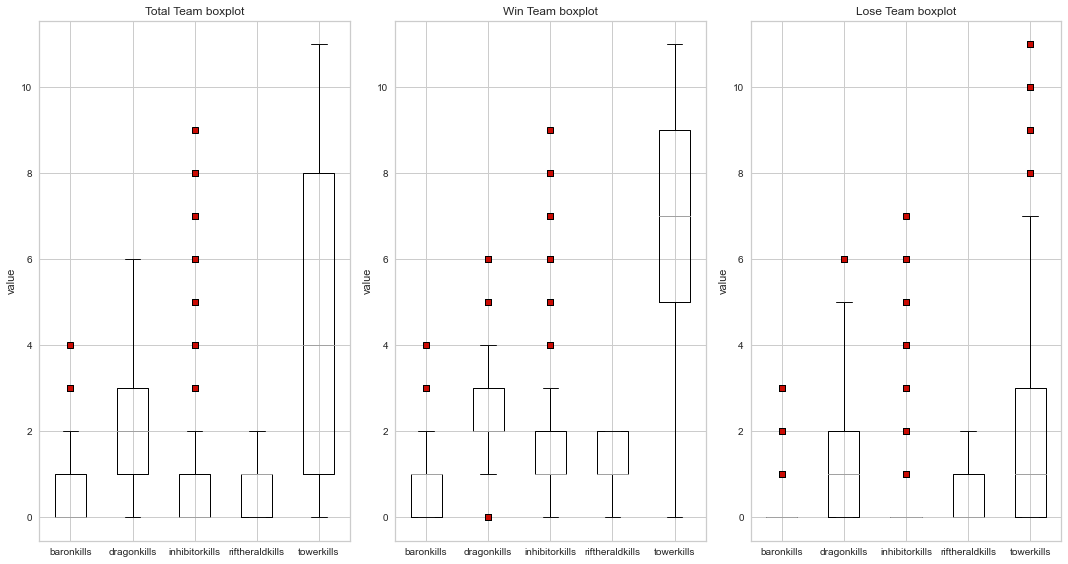

In [443]:
# 바론킬수, 용킬수, 깬 억제기수, 전령킬수, 깬 타워수 분포
from matplotlib import gridspec
plt.figure(figsize=(15,8))
gs = gridspec.GridSpec(nrows=1, # row 몇 개 
                       ncols=3, # col 몇 개 
                       height_ratios=[8], 
                       width_ratios=[10,10,10]
                      )


ax1 = plt.subplot(gs[0])
ax1.set_title('Total Team boxplot')
ax1.set_ylabel('value')
green_diamond = dict(markerfacecolor='r', marker='s')
boxplot=df_total.boxplot(column=['baronkills','dragonkills','inhibitorkills','riftheraldkills','towerkills'],flierprops=green_diamond,ax=ax1)

ax2 = plt.subplot(gs[1])
ax2.set_title('Win Team boxplot')
ax2.set_ylabel('value')
green_diamond = dict(markerfacecolor='r', marker='s')
boxplot=df_winteams.boxplot(column=['baronkills','dragonkills','inhibitorkills','riftheraldkills','towerkills'],flierprops=green_diamond,ax=ax2)

ax3 = plt.subplot(gs[2])
ax3.set_title('Lose Team boxplot')
ax3.set_ylabel('value')
green_diamond = dict(markerfacecolor='r', marker='s')
boxplot=df_loseteams.boxplot(column=['baronkills','dragonkills','inhibitorkills','riftheraldkills','towerkills'],flierprops=green_diamond,ax=ax3)


plt.tight_layout()


plt.show()

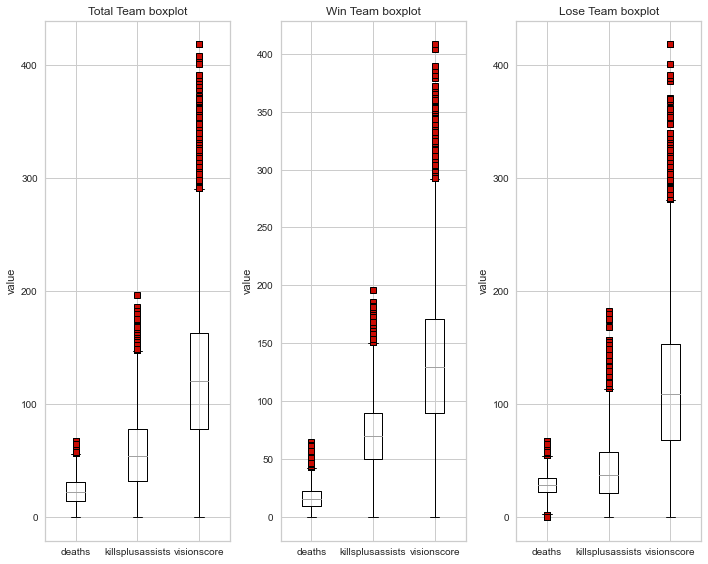

In [447]:
# 데스, 킬+어시, 시야점수 분포

plt.figure(figsize=(10,8))
gs = gridspec.GridSpec(nrows=1, # row 몇 개 
                       ncols=3, # col 몇 개 
                       height_ratios=[8], 
                       width_ratios=[10,10,10]
                      )
ax1 = plt.subplot(gs[0])
ax1.set_title('Total Team boxplot')
ax1.set_ylabel('value')
green_diamond = dict(markerfacecolor='r', marker='s')
boxplot=df_total.boxplot(column=['deaths','killsplusassists','visionscore'],flierprops=green_diamond,ax=ax1)

ax2 = plt.subplot(gs[1])
ax2.set_title('Win Team boxplot')
ax2.set_ylabel('value')
green_diamond = dict(markerfacecolor='r', marker='s')
boxplot=df_winteams.boxplot(column=['deaths','killsplusassists','visionscore'],flierprops=green_diamond,ax=ax2)

ax3 = plt.subplot(gs[2])
ax3.set_title('Lose Team boxplot')
ax3.set_ylabel('value')
green_diamond = dict(markerfacecolor='r', marker='s')
boxplot=df_loseteams.boxplot(column=['deaths','killsplusassists','visionscore'],flierprops=green_diamond,ax=ax3)



plt.tight_layout()
plt.show()

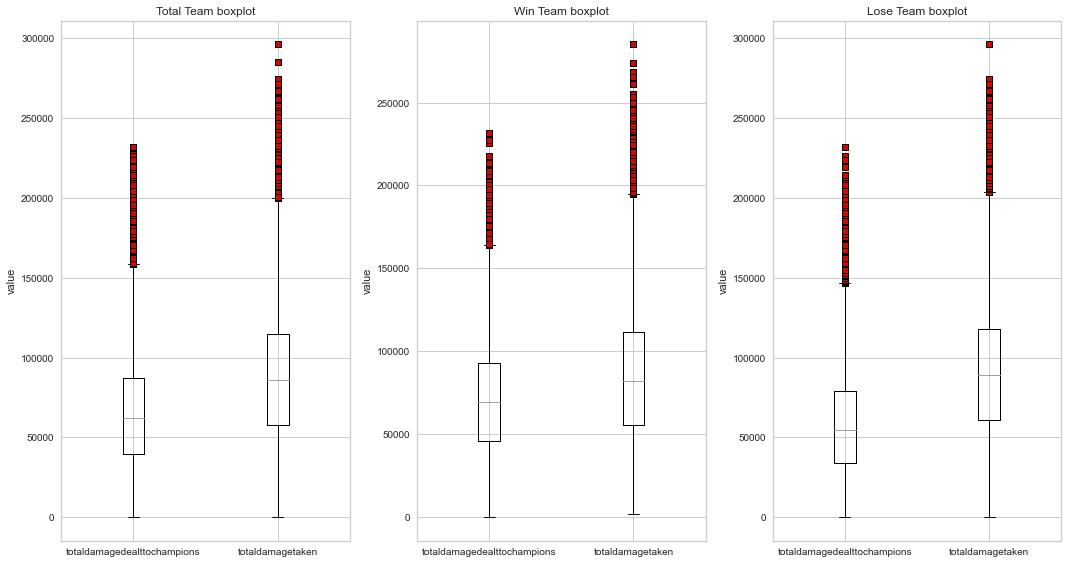

In [452]:
# (팀당 합산값) 챔피언에게가한 총 딜량, 받은 총 피해량 
plt.figure(figsize=(15,8))
gs = gridspec.GridSpec(nrows=1, # row 몇 개 
                       ncols=3, # col 몇 개 
                       height_ratios=[8], 
                       width_ratios=[10,10,10]
                      )
                       
ax1 = plt.subplot(gs[0])
ax1.set_title('Total Team boxplot')
ax1.set_ylabel('value')
green_diamond = dict(markerfacecolor='r', marker='s')
boxplot=df_total.boxplot(column=['totaldamagedealttochampions','totaldamagetaken'],flierprops=green_diamond,ax=ax1)
                       
ax2 = plt.subplot(gs[1])
ax2.set_title('Win Team boxplot')
ax2.set_ylabel('value')
green_diamond = dict(markerfacecolor='r', marker='s')
boxplot=df_winteams.boxplot(column=['totaldamagedealttochampions','totaldamagetaken'],flierprops=green_diamond,ax=ax2)

ax3 = plt.subplot(gs[2])
ax3.set_title('Lose Team boxplot')
ax3.set_ylabel('value')
green_diamond = dict(markerfacecolor='r', marker='s')
boxplot=df_loseteams.boxplot(column=['totaldamagedealttochampions','totaldamagetaken'],flierprops=green_diamond,ax=ax3)


                                
plt.tight_layout()                       
plt.show()

<bound method Series.mean of 0        766.0
1        723.0
2        579.0
3        500.0
4        378.0
         ...  
29965    689.0
29966    591.0
29967    743.0
29968    616.0
29969    783.0
Name: totalminionskilled, Length: 59940, dtype: float64> <bound method Series.std of 0        766.0
1        723.0
2        579.0
3        500.0
4        378.0
         ...  
29965    689.0
29966    591.0
29967    743.0
29968    616.0
29969    783.0
Name: totalminionskilled, Length: 59940, dtype: float64>


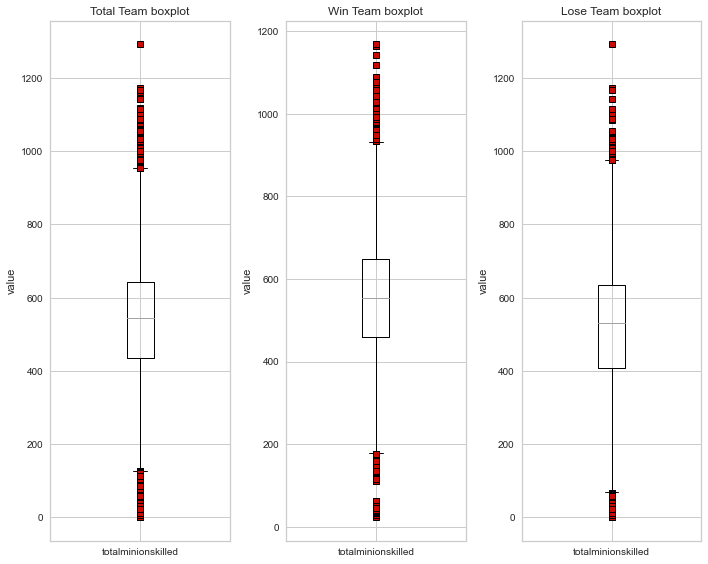

In [455]:
# (팀당 합산값) CS 분포 
plt.figure(figsize=(10,8))
gs = gridspec.GridSpec(nrows=1, # row 몇 개 
                       ncols=3, # col 몇 개 
                       height_ratios=[8], 
                       width_ratios=[10,10,10]
                      )
                       
ax1 = plt.subplot(gs[0])
ax1.set_title('Total Team boxplot')
ax1.set_ylabel('value')
green_diamond = dict(markerfacecolor='r', marker='s')
boxplot=df_total.boxplot(column=['totalminionskilled'],flierprops=green_diamond,ax=ax1)

ax2 = plt.subplot(gs[1])
ax2.set_title('Win Team boxplot')
ax2.set_ylabel('value')
green_diamond = dict(markerfacecolor='r', marker='s')
boxplot=df_winteams.boxplot(column=['totalminionskilled'],flierprops=green_diamond,ax=ax2)

ax3 = plt.subplot(gs[2])
ax3.set_title('Lose Team boxplot')
ax3.set_ylabel('value')
green_diamond = dict(markerfacecolor='r', marker='s')
boxplot=df_loseteams.boxplot(column=['totalminionskilled'],flierprops=green_diamond,ax=ax3)

print(df_total['totalminionskilled'].mean,df_total['totalminionskilled'].std)

plt.tight_layout()
plt.show()

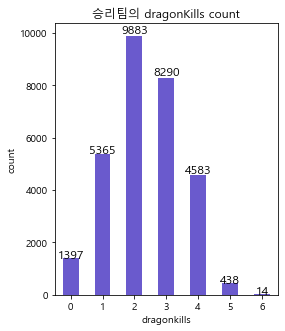

In [262]:
# 승리팀의 dragonkills (횟수)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('승리팀의 dragonKills count')
ax.set_xlabel('dragonkills')
ax.set_ylabel('count')

df_winteams['dragonkills'].value_counts().sort_index().plot.bar(rot=0, color='slateblue',figsize=(4,5),fontsize=10)
for p in ax.patches: 
    #print(p.get_bbox().bounds)
    left, bottom, width, height = p.get_bbox().bounds
    #ax.annotate("%d"%(height*1), (left+width-0.25, height+height/50), ha='center',va='center',fontsize=12)
    ax.annotate("%d"%(height), (left+width/2, height*1.01), ha='center',fontsize=12)

In [263]:
winperdragon={}
for i in df_winteams.dragonkills.values:
    if i not in winperdragon:
        winperdragon[i]=1
    else:
        winperdragon[i]+=1

print(sorted(winperdragon.items()))

[(0, 1397), (1, 5365), (2, 9883), (3, 8290), (4, 4583), (5, 438), (6, 14)]


##  용의 개수에 따른 승률은? (용 n개를 먹은 전체(승+패)팀 중, 승리한 팀의 수) 

0  :  0.09792513668863032
1  :  0.3683234930660442
2  :  0.6644927049014994
3  :  0.7831837505904582
4  :  0.8859462594239319
5  :  0.9501084598698482
6  :  0.875


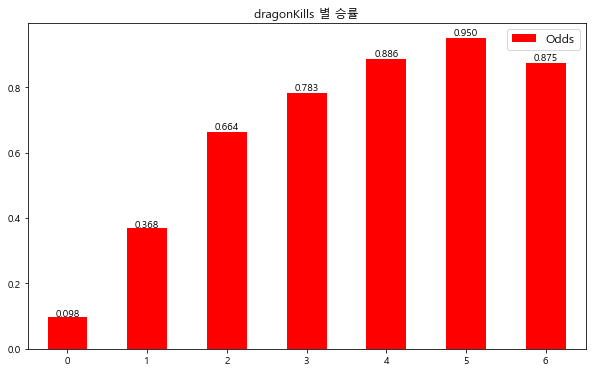

In [324]:
for i in winperdragon.keys():
    tot_dragonkillsteams=df_total[df_total['dragonkills']==i].shape[0]
    dragonwinteams=df_winteams[df_winteams['dragonkills']==i].shape[0]
    dragonloseteams=df_loseteams[df_loseteams['dragonkills']==i].shape[0]
    winperdragon[i]=dragonwinteams/tot_dragonkillsteams
    
for k,v in sorted(winperdragon.items()):
    print(k," : ",v)

df_winper_dragon = pd.DataFrame.from_dict(winperdragon, orient='index')
df_winper_dragon=df_winper_dragon.rename({0:"Odds"},axis='columns')
df_winper_dragon=df_winper_dragon.sort_index()


ax=df_winper_dragon.plot(kind='bar',rot=0,color='r',title='dragonKills 별 승률')
for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%.3f"%(height), (left+width/2, height*1.01), ha='center')

plt.show()

In [457]:
df_total.columns

Index(['baronkills', 'deaths', 'dragonkills', 'firstbaron', 'firstblood',
       'firstdragon', 'firstinhibitor', 'firstriftherald', 'firsttower',
       'gameduration', 'inhibitorkills', 'killsplusassists', 'riftheraldkills',
       'teamid', 'totaldamagedealttochampions', 'totaldamagetaken',
       'totalminionskilled', 'towerkills', 'visionscore', 'win'],
      dtype='object')

In [266]:
# 나머지 baronkills, [dragonkills],inhibitorkills, rigtheraldkills, towerkills 
# for i in df_winteams.dragonkills.values:

sorted(df_winteams['inhibitorkills'].unique())
compare_cntfeature=['baronkills','inhibitorkills','riftheraldkills','towerkills']

In [267]:
res_lst={}
for feature in compare_cntfeature:
    sublst=sorted(df_winteams[feature].unique())
    res_lst[feature]={}
    for i in sublst:
        tot_cnt=df_total[df_total[feature]==i].shape[0]
        win_cnt=df_winteams[df_winteams[feature]==i].shape[0]
        lose_cnt=df_loseteams[df_loseteams[feature]==i].shape[0]
        res_lst[feature][i]=win_cnt/tot_cnt
        
br=res_lst['baronkills']
inh=res_lst['inhibitorkills']
rift=res_lst['riftheraldkills']
tower=res_lst['towerkills']


df_br = pd.DataFrame.from_dict(br, orient='index')
df_br=df_br.rename({0:"Odds"},axis='columns')
df_br=df_br.sort_index()

df_inh = pd.DataFrame.from_dict(inh, orient='index')
df_inh=df_inh.rename({0:"Odds"},axis='columns')
df_inh=df_inh.sort_index()

df_rift = pd.DataFrame.from_dict(rift, orient='index')
df_rift=df_rift.rename({0:"Odds"},axis='columns')
df_rift=df_rift.sort_index()

df_tower = pd.DataFrame.from_dict(tower, orient='index')
df_tower=df_tower.rename({0:"Odds"},axis='columns')
df_tower=df_tower.sort_index()

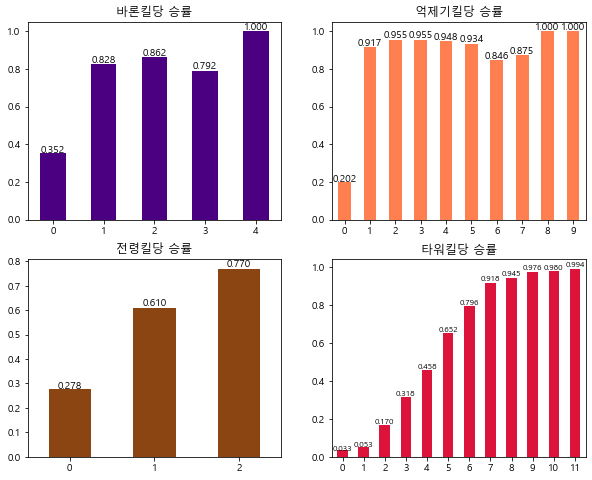

In [268]:
figure, ((ax1,ax2),(ax3,ax4))=plt.subplots(nrows=2,ncols=2)
figure.set_size_inches(10,8)

df_br.plot(kind='bar',rot=0,color='indigo',title='바론킬당 승률',ax=ax1)
ax1.get_legend().remove()
for p in ax1.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax1.annotate("%.3f"%(height), (left+width/2, height*1.01), ha='center',fontsize=10)
    
df_inh.plot(kind='bar',rot=0,color='coral',title='억제기킬당 승률',ax=ax2)   
ax2.get_legend().remove()
for p in ax2.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax2.annotate("%.3f"%(height), (left+width/2, height*1.01), ha='center',fontsize=10)
    
df_rift.plot(kind='bar',rot=0,color='saddlebrown',title='전령킬당 승률',ax=ax3)   
ax3.get_legend().remove()
for p in ax3.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax3.annotate("%.3f"%(height), (left+width/2, height*1.01), ha='center',fontsize=10)
    
df_tower.plot(kind='bar',rot=0,color='crimson',title='타워킬당 승률',ax=ax4)   
ax4.get_legend().remove()
for p in ax4.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax4.annotate("%.3f"%(height), (left+width/2, height*1.01), ha='center',fontsize=8)

In [269]:
def bar_chart(feature,df):    # 각 피쳐별 라벨값(win)의 확률을 보고싶을대 사용 
    
    wins = df[df['win']=='Win'][feature].value_counts()
    loses = df[df['win']=='Fail'][feature].value_counts()
    tot=wins+loses
    df2 = pd.DataFrame([wins/tot,loses/tot])
    df2.index = ['wins','loses']
    print(df2)
    ax=df2.plot(kind='bar',stacked=False, rot=0,figsize=(4,5),fontsize=10)
    
    # 범례 나타내기
    ax.legend(loc='upper right', shadow=True, ncol=1, bbox_to_anchor=(1.15, 1))
    plt.rc('legend', fontsize=12)
    
    # 보조선(눈금선) 나타내기
    ax.set_axisbelow(True)
    ax.yaxis.grid(True, color='gray', linestyle='dashed', linewidth=0.5)
    for p in ax.patches: 
        #print(p.get_bbox().bounds)
        left, bottom, width, height = p.get_bbox().bounds 
        ax.annotate("%d"%(height*100), (left+width/2, bottom+height/2), ha='center',va='center',fontsize=13)
    
    # plt.rcParams.update({'font.size': 22})
    #matplotlib.rcParams.update({'font.size': 22})
    
    
    # 그래프 저장하고 출력하기
    '''
    plt.tight_layout()
    plt.savefig('ex_barplot.png', format='png', dpi=300)
    plt.show()
    '''
    
    plt.show()

         False      True
wins   0.35891  0.648313
loses  0.64109  0.351687


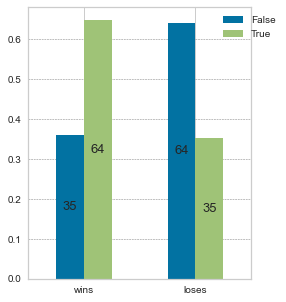

In [458]:
bar_chart('firstdragon',df_total)

In [272]:
bool_features

['firstdragon',
 'firstinhibitor',
 'firstriftherald',
 'firstbaron',
 'firstblood',
 'firsttower']

In [273]:
T_win,F_win = df_total[df_total['win']=='Win']['firstdragon'].value_counts(sort=True)
# print(df_total[df_total['win']=='Win']['firsttower'].value_counts(sort=True))
T_lose,F_lose = df_total[df_total['win']=='Fail']['firstdragon'].value_counts(sort=True)
print('T_win : ',T_win)
print('F_win : ',F_win)
print('T_lose : ',T_lose)
print('F_lose : ',F_lose)


T_winratio=T_win/(T_win+T_lose)   # True일때의 승률
F_winratio=F_win/(F_win+F_lose)   # False일때의 승률 

print(T_winratio,F_winratio)

T_win :  18945
F_win :  11025
T_lose :  19693
F_lose :  10277
0.49032040995910764 0.5175570368979439


## bool_features, win여부별 비율 및 승률 그래프 확인 

In [274]:
# bool_feature별 승률 Dataframe 생성
df_winratio=pd.DataFrame(columns=['T_winratio','F_winratio'])
ind=0
for feature in bool_features:
    #print(feature)
    T_win,F_win = df_total[df_total['win']=='Win'][feature].value_counts(sort=True)
    F_lose,T_lose = df_total[df_total['win']=='Fail'][feature].value_counts(sort=True)

#     print('T_win : ',T_win,'F_win : ',F_win)
#     print('T_lose : ',T_lose,'F_lose : ',F_lose)
#     print()
    T_winratio=T_win/(T_win+T_lose)   # True일때의 비율
    F_winratio=F_win/(F_win+F_lose)   # False일때의 비율
    
    df_winratio.loc[ind]=[T_winratio,F_winratio]
    ind+=1

df_winratio.index=bool_features 
#df_winratio=df_winratio.transpose()
df_winratio

,T_winratio,F_winratio
firstdragon,0.648313,0.358910
firstinhibitor,0.942248,0.226754
firstriftherald,0.657311,0.353584
firstbaron,0.859274,0.342131
firstblood,0.606942,0.393528
firsttower,0.750709,0.255210


In [275]:
# 승리한 팀에 대하여 'firstdragon'의 T,F 횟수
print(df_total[df_total['win']=='Win']['firstdragon'].value_counts(sort=True))  
print(df_total[df_total['win']=='Fail']['firsttower'].value_counts(sort=True))

True     18945
False    11025
Name: firstdragon, dtype: int64
False    22588
True      7382
Name: firsttower, dtype: int64


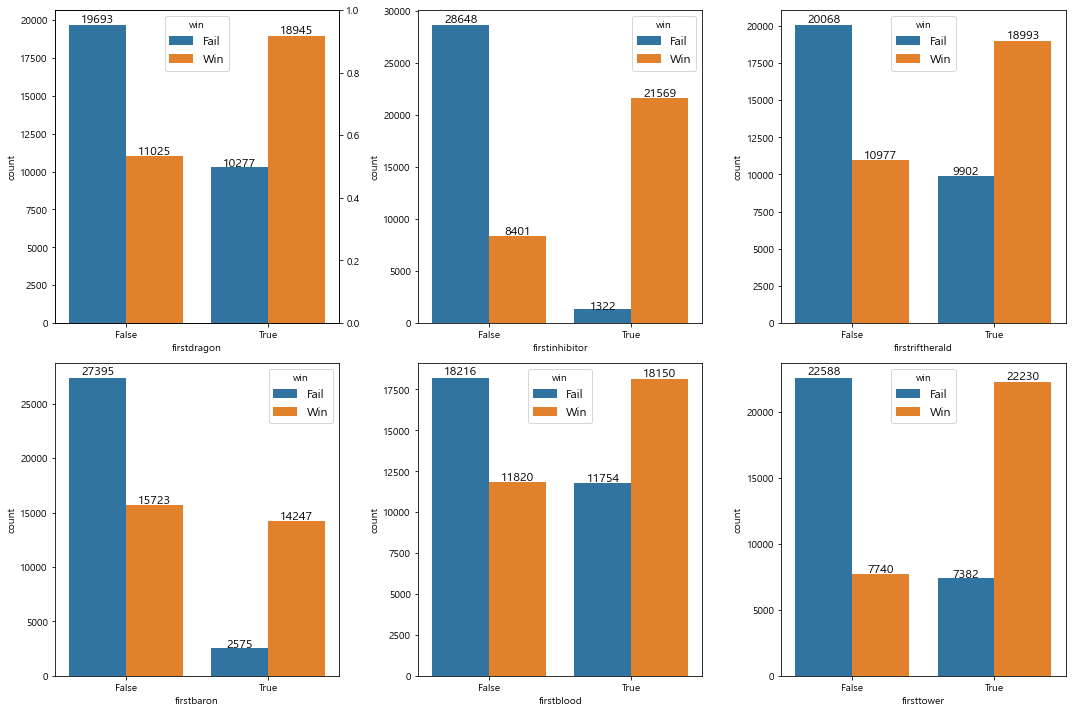

In [276]:
def graph_showing_count_unstacked():  

    figure, ((ax1,ax2,ax3),(ax4,ax5,ax6))=plt.subplots(nrows=2,ncols=3)
    figure.set_size_inches(15,10)
    
    # 각 subplot에 승률 linegraph넣어야됌
    sns.countplot(x='firstdragon',hue='win',data=df_total,ax=ax1)
    
    ax1_1 = ax1.twinx()
    ax1_1
    for p in ax1.patches: 
        left, bottom, width, height = p.get_bbox().bounds 
        ax1.annotate("%d"%(height), (left+width/2, height*1.01), ha='center',fontsize=12)

    sns.countplot(x='firstinhibitor',hue='win',data=df_total,ax=ax2)
    for p in ax2.patches: 
        left, bottom, width, height = p.get_bbox().bounds 
        ax2.annotate("%d"%(height), (left+width/2, height*1.01), ha='center',fontsize=12)
    sns.countplot(x='firstriftherald',hue='win',data=df_total,ax=ax3)
    for p in ax3.patches: 
        left, bottom, width, height = p.get_bbox().bounds 
        ax3.annotate("%d"%(height), (left+width/2, height*1.01), ha='center',fontsize=12)
    sns.countplot(x='firstbaron',hue='win',data=df_total,ax=ax4)
    for p in ax4.patches: 
        left, bottom, width, height = p.get_bbox().bounds 
        ax4.annotate("%d"%(height), (left+width/2, height*1.01), ha='center',fontsize=12)
    sns.countplot(x='firstblood',hue='win',data=df_total,ax=ax5)
    for p in ax5.patches: 
        left, bottom, width, height = p.get_bbox().bounds 
        ax5.annotate("%d"%(height), (left+width/2, height*1.01), ha='center',fontsize=12)
    sns.countplot(x='firsttower',hue='win',data=df_total,ax=ax6)
    for p in ax6.patches: 
        left, bottom, width, height = p.get_bbox().bounds 
        ax6.annotate("%d"%(height), (left+width/2, height*1.01), ha='center',fontsize=12)
    figure.tight_layout()
    figure.show()
graph_showing_count_unstacked()

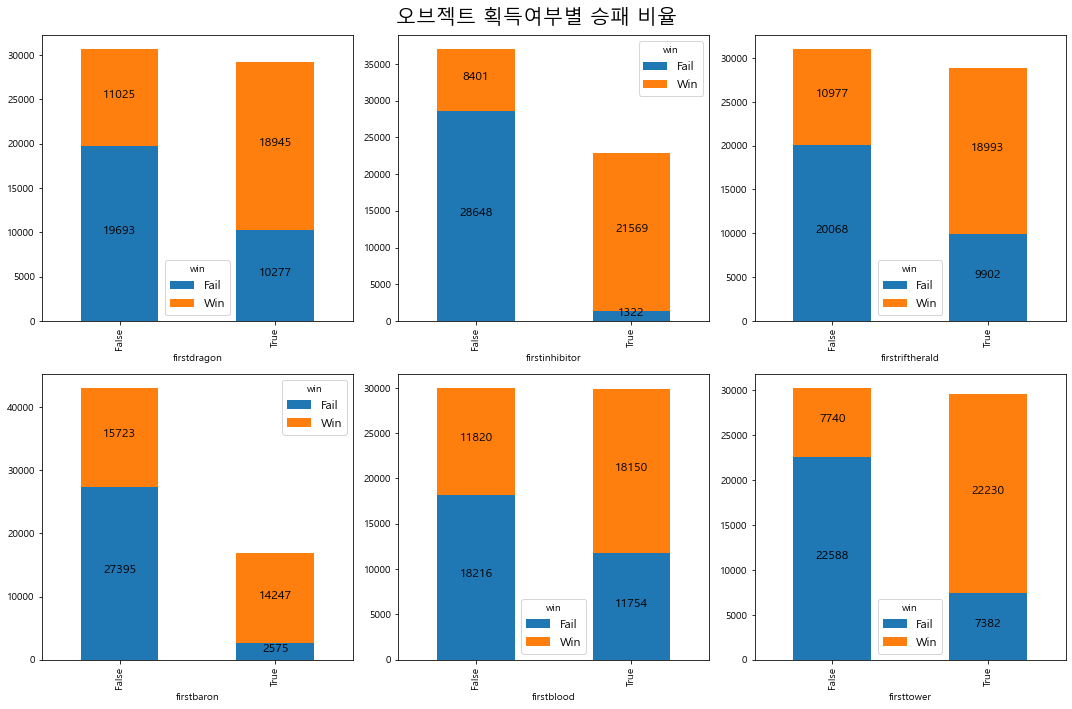

In [277]:
def graph_showing_count_stacked():  # 이거 비율로 바꿔야.. 

    figure, ((ax1,ax2,ax3),(ax4,ax5,ax6))=plt.subplots(nrows=2,ncols=3)
    figure.set_size_inches(15,10)
    plt.suptitle('오브젝트 획득여부별 승패 비율',fontsize=20)
    # 각 subplot에 승률 linegraph넣어야됌
    df_total.groupby(['firstdragon','win']).size().unstack().plot(kind='bar',stacked=True,ax=ax1)
    #sns.countplot(x='firstdragon',hue='win',data=df_total,ax=ax1)
    #ax1.legend()
    #ax1_1 = ax1.twinx()
    #ax1_1
    for p in ax1.patches: 
        left, bottom, width, height = p.get_bbox().bounds 
        ax1.annotate("%d"%(height), (left+width/2, bottom+height/2), ha='center',fontsize=12)
    
    df_total.groupby(['firstinhibitor','win']).size().unstack().plot(kind='bar',stacked=True,ax=ax2)
    for p in ax2.patches: 
        left, bottom, width, height = p.get_bbox().bounds 
        ax2.annotate("%d"%(height), (left+width/2, bottom+height/2), ha='center',fontsize=12)
        
    df_total.groupby(['firstriftherald','win']).size().unstack().plot(kind='bar',stacked=True,ax=ax3)
    for p in ax3.patches: 
        left, bottom, width, height = p.get_bbox().bounds 
        ax3.annotate("%d"%(height), (left+width/2, bottom+height/2), ha='center',fontsize=12)
        
    df_total.groupby(['firstbaron','win']).size().unstack().plot(kind='bar',stacked=True,ax=ax4)
    for p in ax4.patches: 
        left, bottom, width, height = p.get_bbox().bounds 
        ax4.annotate("%d"%(height), (left+width/2, bottom+height/2), ha='center',fontsize=12)
        
    df_total.groupby(['firstblood','win']).size().unstack().plot(kind='bar',stacked=True,ax=ax5)
    for p in ax5.patches: 
        left, bottom, width, height = p.get_bbox().bounds 
        ax5.annotate("%d"%(height), (left+width/2, bottom+height/2), ha='center',fontsize=12)
        
    df_total.groupby(['firsttower','win']).size().unstack().plot(kind='bar',stacked=True,ax=ax6)
    for p in ax6.patches: 
        left, bottom, width, height = p.get_bbox().bounds 
        ax6.annotate("%d"%(height), (left+width/2, bottom+height/2), ha='center',fontsize=12)
    figure.tight_layout()
    figure.show()
graph_showing_count_stacked()

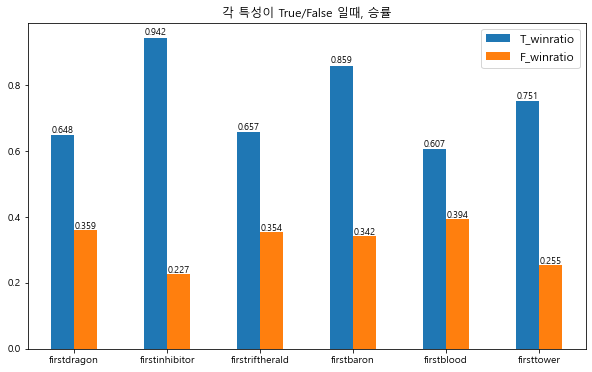

In [278]:
# 각 특성별 승률 그래프 (각 특성이 True/False 일때, 승률 (이긴팀/(이긴팀+진팀) )

ax1=df_winratio.plot(kind='bar',figsize=(10,6),rot=0)
ax1.set_title('각 특성이 True/False 일때, 승률')
for p in ax1.patches: 
        left, bottom, width, height = p.get_bbox().bounds
        ax1.annotate("%.3f"%height, (left+width/2, height*1.01), ha='center',fontsize=9)

In [279]:
df_total[df_total['firstdragon']==True]['win'].value_counts()

Win     18945
Fail    10277
Name: win, dtype: int64

In [284]:
df_total
print(df_total.columns)  

Index(['baronkills', 'deaths', 'dragonkills', 'firstbaron', 'firstblood',
       'firstdragon', 'firstinhibitor', 'firstriftherald', 'firsttower',
       'gameduration', 'inhibitorkills', 'killsplusassists', 'riftheraldkills',
       'teamid', 'totaldamagedealttochampions', 'totaldamagetaken',
       'totalminionskilled', 'towerkills', 'visionscore', 'win'],
      dtype='object')


In [285]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59940 entries, 0 to 29969
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   baronkills                   59940 non-null  int64   
 1   deaths                       59940 non-null  float64 
 2   dragonkills                  59940 non-null  int64   
 3   firstbaron                   59940 non-null  category
 4   firstblood                   59940 non-null  category
 5   firstdragon                  59940 non-null  category
 6   firstinhibitor               59940 non-null  category
 7   firstriftherald              59940 non-null  category
 8   firsttower                   59940 non-null  category
 9   gameduration                 59940 non-null  float64 
 10  inhibitorkills               59940 non-null  int64   
 11  killsplusassists             59940 non-null  float64 
 12  riftheraldkills              59940 non-null  int64   
 13  t

In [286]:
df_total=df_total[df_total.columns.difference(['gameid'])]  
df_total.columns

Index(['baronkills', 'deaths', 'dragonkills', 'firstbaron', 'firstblood',
       'firstdragon', 'firstinhibitor', 'firstriftherald', 'firsttower',
       'gameduration', 'inhibitorkills', 'killsplusassists', 'riftheraldkills',
       'teamid', 'totaldamagedealttochampions', 'totaldamagetaken',
       'totalminionskilled', 'towerkills', 'visionscore', 'win'],
      dtype='object')

## df_total(df['teams']의 heatmap 생성 -> 상관관계 파악

In [287]:
from sklearn.preprocessing import LabelEncoder  # 상관분석을 위해 categorical To numeric

'''
 Falase : 0, True : 1 
 Win : 1, Fail : 0 
 ['teamid'] = 100 : 0 / 200 : 1
'''

df_corr=copy.deepcopy(df_total)
lb_make = LabelEncoder()
df_corr["firstdragon"] = lb_make.fit_transform(df_corr["firstdragon"])
df_corr["firstinhibitor"] = lb_make.fit_transform(df_corr["firstinhibitor"])
df_corr["firstriftherald"] = lb_make.fit_transform(df_corr["firstriftherald"])
df_corr["firstbaron"] = lb_make.fit_transform(df_corr["firstbaron"])
df_corr["firstblood"] = lb_make.fit_transform(df_corr["firstblood"])
df_corr["firsttower"] = lb_make.fit_transform(df_corr["firsttower"])
df_corr["teamid"] = lb_make.fit_transform(df_corr["teamid"])
df_corr["win"] = lb_make.fit_transform(df_corr["win"])
print(df_corr.columns)
print(len(df_corr.columns))

Index(['baronkills', 'deaths', 'dragonkills', 'firstbaron', 'firstblood',
       'firstdragon', 'firstinhibitor', 'firstriftherald', 'firsttower',
       'gameduration', 'inhibitorkills', 'killsplusassists', 'riftheraldkills',
       'teamid', 'totaldamagedealttochampions', 'totaldamagetaken',
       'totalminionskilled', 'towerkills', 'visionscore', 'win'],
      dtype='object')
20


In [288]:
print(len(df_total.columns))

20


In [289]:
df_corr.info()  # All Dtype -> (int64 or float64)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59940 entries, 0 to 29969
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   baronkills                   59940 non-null  int64  
 1   deaths                       59940 non-null  float64
 2   dragonkills                  59940 non-null  int64  
 3   firstbaron                   59940 non-null  int32  
 4   firstblood                   59940 non-null  int32  
 5   firstdragon                  59940 non-null  int32  
 6   firstinhibitor               59940 non-null  int32  
 7   firstriftherald              59940 non-null  int32  
 8   firsttower                   59940 non-null  int32  
 9   gameduration                 59940 non-null  float64
 10  inhibitorkills               59940 non-null  int64  
 11  killsplusassists             59940 non-null  float64
 12  riftheraldkills              59940 non-null  int64  
 13  teamid          

In [291]:
print(df_corr.shape)
df_corr.head(5)

(59940, 20)


,baronkills,deaths,dragonkills,firstbaron,firstblood,firstdragon,firstinhibitor,firstriftherald,firsttower,gameduration,inhibitorkills,killsplusassists,riftheraldkills,teamid,totaldamagedealttochampions,totaldamagetaken,totalminionskilled,towerkills,visionscore,win
0,0,40.0,4,0,0,1,1,1,1,2114.0,2,84.0,1,0,111120.0,152349.0,766.0,10,228.0,1
1,2,27.0,3,1,1,1,1,1,1,2347.0,2,78.0,1,1,131272.0,161027.0,723.0,9,212.0,1
2,0,12.0,3,0,1,1,1,0,1,1520.0,1,75.0,1,0,66767.0,71536.0,579.0,6,117.0,1
3,1,16.0,3,1,1,1,0,0,1,1308.0,0,62.0,0,1,57839.0,72969.0,500.0,4,89.0,1
4,0,10.0,1,0,1,1,0,1,1,913.0,0,43.0,1,0,30667.0,39750.0,378.0,4,52.0,1


In [292]:
print(df_total.shape)
df_total.head(5)

(59940, 20)


,baronkills,deaths,dragonkills,firstbaron,firstblood,firstdragon,firstinhibitor,firstriftherald,firsttower,gameduration,inhibitorkills,killsplusassists,riftheraldkills,teamid,totaldamagedealttochampions,totaldamagetaken,totalminionskilled,towerkills,visionscore,win
0,0,40.0,4,False,False,True,True,True,True,2114.0,2,84.0,1,100,111120.0,152349.0,766.0,10,228.0,Win
1,2,27.0,3,True,True,True,True,True,True,2347.0,2,78.0,1,200,131272.0,161027.0,723.0,9,212.0,Win
2,0,12.0,3,False,True,True,True,False,True,1520.0,1,75.0,1,100,66767.0,71536.0,579.0,6,117.0,Win
3,1,16.0,3,True,True,True,False,False,True,1308.0,0,62.0,0,200,57839.0,72969.0,500.0,4,89.0,Win
4,0,10.0,1,False,True,True,False,True,True,913.0,0,43.0,1,100,30667.0,39750.0,378.0,4,52.0,Win


In [293]:
corrmat = df_corr.corr()
corrmat

,baronkills,deaths,dragonkills,firstbaron,firstblood,firstdragon,firstinhibitor,firstriftherald,firsttower,gameduration,inhibitorkills,killsplusassists,riftheraldkills,teamid,totaldamagedealttochampions,totaldamagetaken,totalminionskilled,towerkills,visionscore,win
baronkills,1.000000,0.137815,0.496411,0.876263,0.053912,0.100770,0.451663,0.091326,0.147775,5.060851e-01,0.533226,0.583378,0.172017,1.821140e-02,0.557384,0.460149,0.468395,0.562343,0.554935,4.159042e-01
deaths,0.137815,1.000000,0.022723,0.050695,-0.143756,-0.125391,-0.233005,-0.142927,-0.262195,6.818741e-01,-0.106461,0.371889,-0.143814,1.262474e-02,0.627599,0.781377,0.530752,-0.139926,0.517920,-4.918489e-01
dragonkills,0.496411,0.022723,1.000000,0.464174,0.167303,0.543736,0.489197,0.193323,0.336097,4.965872e-01,0.504777,0.636118,0.319309,3.771355e-02,0.559882,0.426363,0.524263,0.644417,0.578150,5.427808e-01
firstbaron,0.876263,0.050695,0.464174,1.000000,0.063681,0.110529,0.482593,0.107800,0.173522,4.005526e-01,0.496400,0.521643,0.197602,1.203031e-02,0.451700,0.345239,0.387042,0.555366,0.459392,4.333883e-01
firstblood,0.053912,-0.143756,0.167303,0.063681,1.000000,0.163360,0.161096,0.167563,0.234626,6.566120e-03,0.133582,0.123008,0.187643,-3.770446e-02,0.048268,-0.010169,0.052010,0.203454,0.052045,2.134139e-01
firstdragon,0.100770,-0.125391,0.543736,0.110529,0.163360,1.000000,0.209197,0.133734,0.233759,5.730191e-02,0.172843,0.174429,0.178686,5.400414e-02,0.096736,0.033095,0.114380,0.268373,0.109389,2.893127e-01
firstinhibitor,0.451663,-0.233005,0.489197,0.482593,0.161096,0.209197,1.000000,0.269595,0.403863,1.818141e-01,0.805754,0.488658,0.374222,-3.519680e-02,0.311624,0.125373,0.224741,0.829908,0.278853,6.952485e-01
firstriftherald,0.091326,-0.142927,0.193323,0.107800,0.167563,0.133734,0.269595,1.000000,0.519362,4.093490e-02,0.225357,0.152289,0.805078,-1.119506e-01,0.082012,0.014544,0.091071,0.345591,0.098813,3.035320e-01
firsttower,0.147775,-0.262195,0.336097,0.173522,0.234626,0.233759,0.403863,0.519362,1.000000,3.362084e-02,0.341017,0.243788,0.534416,-6.707185e-02,0.121753,-0.006805,0.123054,0.517345,0.133469,4.954641e-01
gameduration,0.506085,0.681874,0.496587,0.400553,0.006566,0.057302,0.181814,0.040935,0.033621,1.000000e+00,0.293454,0.719789,0.123683,2.355127e-16,0.904754,0.936184,0.934316,0.376589,0.922044,1.211752e-19


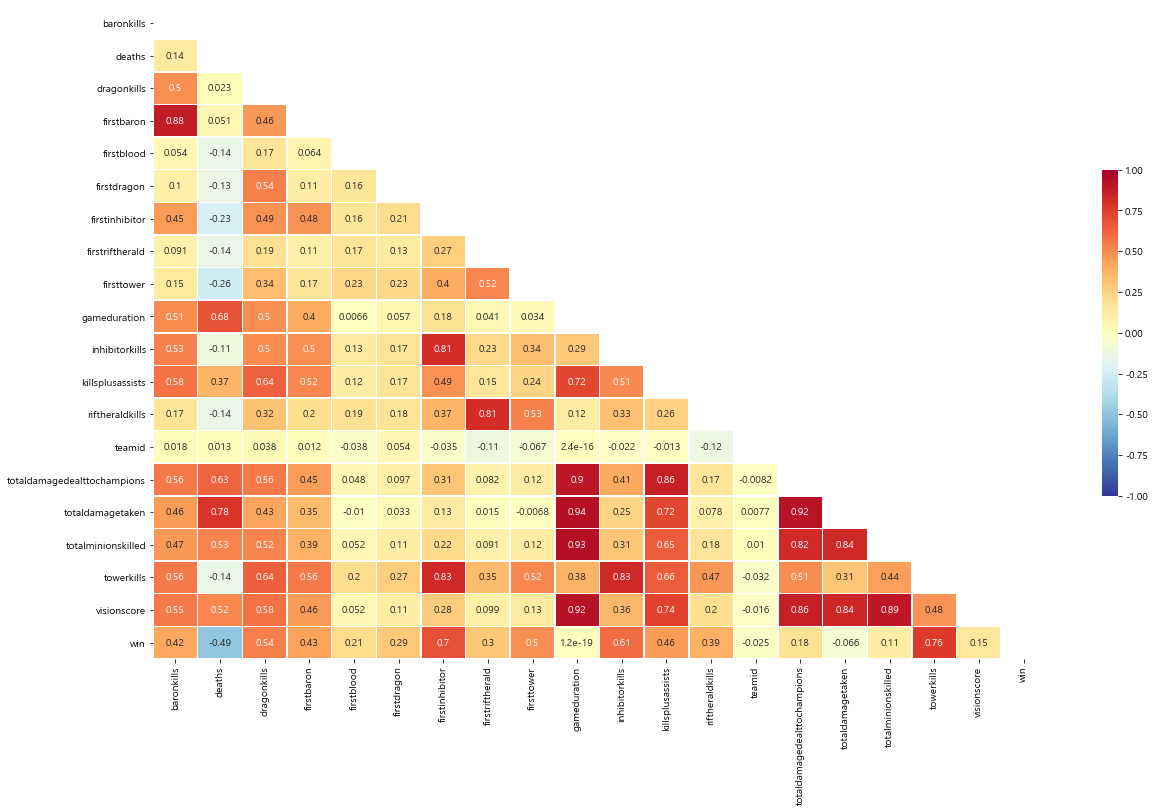

In [294]:
def makeheatmap(df):
    df = df.corr()
    # 그림 사이즈 지정
    fig, ax = plt.subplots( figsize=(20,12) )

    # 삼각형 마스크(위 쪽 삼각형에 True, 아래 삼각형에 False)
    mask = np.zeros_like(df, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # 히트맵을 그리기
    sns.heatmap(df, 
                cmap = 'RdYlBu_r', 
                annot = True,   # 실제 값을 표시한다
                mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
                linewidths=.5,  # 경계면 실선으로 구분하기
                cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
                vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
               )  
    plt.show()
makeheatmap(df_corr)
# teamid ===100 : 블루진영 (아래) / teamid==200 : 레드진영(위)

In [325]:
from scipy.stats import pearsonr

def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    #print(df.info())
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            #print(r,c)
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 5)
    return pvalues

calculate_pvalues(df_corr) 

,baronkills,deaths,dragonkills,firstbaron,firstblood,firstdragon,firstinhibitor,firstriftherald,firsttower,gameduration,inhibitorkills,killsplusassists,riftheraldkills,teamid,totaldamagedealttochampions,totaldamagetaken,totalminionskilled,towerkills,visionscore,win
baronkills,0,0,0,0,0,0,0,0,0,0,0,0,0,1e-05,0,0,0,0,0,0
deaths,0,0,0,0,0,0,0,0,0,0,0,0,0,0.002,0,0,0,0,0,0
dragonkills,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
firstbaron,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00323,0,0,0,0,0,0
firstblood,0,0,0,0,0,0,0,0,0,0.10794,0,0,0,0,0,0.01279,0,0,0,0
firstdragon,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
firstinhibitor,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
firstriftherald,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00037,0,0,0,0
firsttower,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.09569,0,0,0,0
gameduration,0,0,0,0,0.10794,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


모집단의 상관계수 추정 결과

귀무가설 : 변수끼리의 상관관계가 없다(a=0.05)

대립가설 : 변수끼리의 상관관계가 있다(a=0.05)

firsttower 변수와 총 받은 데미지량 변수의 pvalue와 teamid 변수와 총받은 데미지량 변수의 pvalue가 0.05이상이므로, 귀무가설 채택 

->  0.05의 유의수준에서 상관관계가 없다.

나머지 변수간사이에는 0.05미만이므로, 대립가설을 채택 

-> 0.05의 유의수준에서 상관관계가 있다.

## 승률 예측 모델 생성

데이터 : categorical, numeric data가 혼합되어있는 상태

In [306]:
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import mglearn

# Decision Tree

In [347]:
df_total2=copy.deepcopy(df_total)
df_total2=df_total2[df_total2.columns.difference(['gameduration','teamid','totaldamagetaken'])]
print(df_total2.columns)
print(len(df_total2.columns))

Index(['baronkills', 'deaths', 'dragonkills', 'firstbaron', 'firstblood',
       'firstdragon', 'firstinhibitor', 'firstriftherald', 'firsttower',
       'inhibitorkills', 'killsplusassists', 'riftheraldkills',
       'totaldamagedealttochampions', 'totalminionskilled', 'towerkills',
       'visionscore', 'win'],
      dtype='object')
17


In [460]:
data=df_total2

In [461]:
X,y=data.iloc[:,:-1], data['win']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # train : test = 70 : 30 

tree = DecisionTreeClassifier(max_depth=7, random_state=1)
model=tree.fit(X_train, y_train)
print('훈련셋 정확도 : ', model.score(X_train,y_train))
print('테스트셋 정확도 : ',model.score(X_test,y_test))
#     print('특성 중요도 : \n', tree.feature_importances_)
#     print()

훈련셋 정확도 :  0.9744744744744744
테스트셋 정확도 :  0.9689133578022467


In [462]:
model.predict_proba(X_test)

array([[6.57894737e-04, 9.99342105e-01],
       [9.88313856e-01, 1.16861436e-02],
       [6.57894737e-04, 9.99342105e-01],
       ...,
       [6.57894737e-04, 9.99342105e-01],
       [9.88313856e-01, 1.16861436e-02],
       [9.89583333e-01, 1.04166667e-02]])

In [463]:
feature_importance=model.feature_importances_      
feature_importance

array([2.51520038e-03, 2.22367089e-01, 4.29585000e-04, 0.00000000e+00,
       6.89452706e-05, 5.19011691e-04, 2.61423177e-04, 0.00000000e+00,
       1.15876970e-03, 1.26015495e-02, 1.21563363e-01, 7.56102900e-05,
       7.64287958e-04, 9.88415672e-03, 6.25595623e-01, 2.19538507e-03])

In [407]:
predictions

array([[6.57894737e-04, 9.99342105e-01],
       [9.88313856e-01, 1.16861436e-02],
       [6.57894737e-04, 9.99342105e-01],
       ...,
       [6.57894737e-04, 9.99342105e-01],
       [9.88313856e-01, 1.16861436e-02],
       [9.89583333e-01, 1.04166667e-02]])

In [465]:
y_test2=[]
for i in y_test:
    if i=='Win':
        y_test2.append(0)
    else:
        y_test2.append(1)
y_test2=pd.Series(y_test2)
y_test2

0        0
1        1
2        0
3        1
4        1
        ..
17977    0
17978    1
17979    0
17980    1
17981    1
Length: 17982, dtype: int64

0.9923475470312805


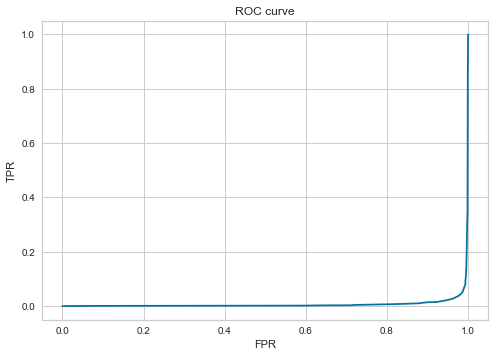

In [466]:
predictions = model.predict_proba(X_test)
print(roc_auc_score(y_test, predictions[:,1]))


fpr, tpr, _ = roc_curve(y_test2, predictions[:,1])
plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

# AutoML

In [469]:
from pycaret.classification import * # AutoML pycaret

In [470]:
df_total2

,baronkills,deaths,dragonkills,firstbaron,firstblood,firstdragon,firstinhibitor,firstriftherald,firsttower,inhibitorkills,killsplusassists,riftheraldkills,totaldamagedealttochampions,totalminionskilled,towerkills,visionscore,win
0,0,40.0,4,False,False,True,True,True,True,2,84.0,1,111120.0,766.0,10,228.0,Win
1,2,27.0,3,True,True,True,True,True,True,2,78.0,1,131272.0,723.0,9,212.0,Win
2,0,12.0,3,False,True,True,True,False,True,1,75.0,1,66767.0,579.0,6,117.0,Win
3,1,16.0,3,True,True,True,False,False,True,0,62.0,0,57839.0,500.0,4,89.0,Win
4,0,10.0,1,False,True,True,False,True,True,0,43.0,1,30667.0,378.0,4,52.0,Win
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29965,1,32.0,2,True,True,True,False,True,True,1,67.0,2,89830.0,689.0,5,162.0,Fail
29966,0,32.0,2,False,True,False,False,False,False,0,82.0,1,125190.0,591.0,4,138.0,Fail
29967,1,38.0,3,False,False,False,False,True,True,0,88.0,2,154791.0,743.0,4,290.0,Fail
29968,0,32.0,0,False,True,False,False,False,False,0,52.0,0,69337.0,616.0,0,97.0,Fail


In [472]:
clf = setup(data = df_total2, target = 'win', feature_selection = True, ignore_low_variance = True)
# Train : Test = 70 : 30

Setup Succesfully Completed!


,Description,Value
0,session_id,6717
1,Target Type,Binary
2,Label Encoded,"Fail: 0, Win: 1"
3,Original Data,"(59940, 17)"
4,Missing Values,False
5,Numeric Features,5
6,Categorical Features,11
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [473]:
top3 = compare_models(n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,CatBoost Classifier,0.9759,0.9976,0.9792,0.9728,0.9759,0.9517,0.9517,14.7521
1,Light Gradient Boosting Machine,0.9752,0.9974,0.9801,0.9706,0.9753,0.9504,0.9504,0.3522
2,Extreme Gradient Boosting,0.9750,0.9972,0.9783,0.9718,0.9751,0.9499,0.9500,1.5593
3,Gradient Boosting Classifier,0.9736,0.9968,0.9764,0.9710,0.9737,0.9472,0.9473,5.3449
4,Ada Boost Classifier,0.9715,0.9967,0.9730,0.9701,0.9715,0.9429,0.9430,1.5925
5,Ridge Classifier,0.9695,0.0000,0.9691,0.9698,0.9695,0.9389,0.9389,0.0537
6,Linear Discriminant Analysis,0.9695,0.9954,0.9691,0.9698,0.9695,0.9389,0.9389,0.2157
7,Random Forest Classifier,0.9669,0.9932,0.9691,0.9649,0.9670,0.9339,0.9339,0.1186
8,Extra Trees Classifier,0.9635,0.9941,0.9726,0.9552,0.9638,0.9270,0.9272,0.7052
9,Decision Tree Classifier,0.9617,0.9617,0.9623,0.9612,0.9617,0.9234,0.9234,0.1991


In [474]:
stacker = stack_models(top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9660,0.9941,0.9646,0.9672,0.9659,0.9319,0.9319
1,0.9401,0.9833,0.9387,0.9413,0.9400,0.8801,0.8802
2,0.9571,0.9889,0.9584,0.9558,0.9571,0.9142,0.9142
3,0.9513,0.9873,0.9489,0.9535,0.9512,0.9026,0.9026
4,0.9142,0.9631,0.9244,0.9059,0.9150,0.8284,0.8286
5,0.9564,0.9896,0.9592,0.9540,0.9566,0.9128,0.9128
6,0.9581,0.9894,0.9544,0.9616,0.9580,0.9162,0.9163
7,0.9431,0.9838,0.9442,0.9423,0.9432,0.8863,0.8863
8,0.9517,0.9880,0.9537,0.9498,0.9518,0.9033,0.9033
9,0.9557,0.9873,0.9544,0.9570,0.9557,0.9114,0.9114


In [475]:
# best_3 = compare_models(n_select = 3)

In [477]:
blended = blend_models(estimator_list = top3, fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9750,0.0000,0.9809,0.9694,0.9751,0.9499,0.9500
1,0.9777,0.0000,0.9806,0.9749,0.9778,0.9554,0.9554
2,0.9743,0.0000,0.9806,0.9684,0.9745,0.9486,0.9487
3,0.9748,0.0000,0.9796,0.9703,0.9749,0.9496,0.9497
4,0.9772,0.0000,0.9782,0.9762,0.9772,0.9544,0.9544
Mean,0.9758,0.0000,0.9800,0.9718,0.9759,0.9516,0.9516
SD,0.0014,0.0000,0.0010,0.0031,0.0013,0.0028,0.0027


In [478]:
pred_holdout = predict_model(blended)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.9751,0,0.9782,0.9721,0.9751,0.9501,0.9501


In [479]:
final_model = finalize_model(blended)

In [480]:
predictions = predict_model(final_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.9875,0,0.989,0.9861,0.9875,0.9751,0.9751


In [484]:
# evaluate_model(final_model)

In [338]:
# 가장 머신러닝 성능이 좋았던 catboost모델 평가
CBC  = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9803,0.9983,0.9830,0.9776,0.9803,0.9605,0.9605
1,0.9830,0.9979,0.9816,0.9843,0.9829,0.9660,0.9660
2,0.9789,0.9981,0.9823,0.9756,0.9790,0.9578,0.9578
3,0.9762,0.9976,0.9816,0.9710,0.9763,0.9523,0.9524
4,0.9779,0.9981,0.9809,0.9749,0.9779,0.9557,0.9558
5,0.9785,0.9974,0.9823,0.9750,0.9786,0.9571,0.9571
6,0.9799,0.9985,0.9837,0.9764,0.9800,0.9598,0.9598
7,0.9809,0.9983,0.9850,0.9770,0.9810,0.9619,0.9619
8,0.9803,0.9982,0.9789,0.9816,0.9802,0.9605,0.9605
9,0.9779,0.9982,0.9789,0.9769,0.9779,0.9557,0.9557


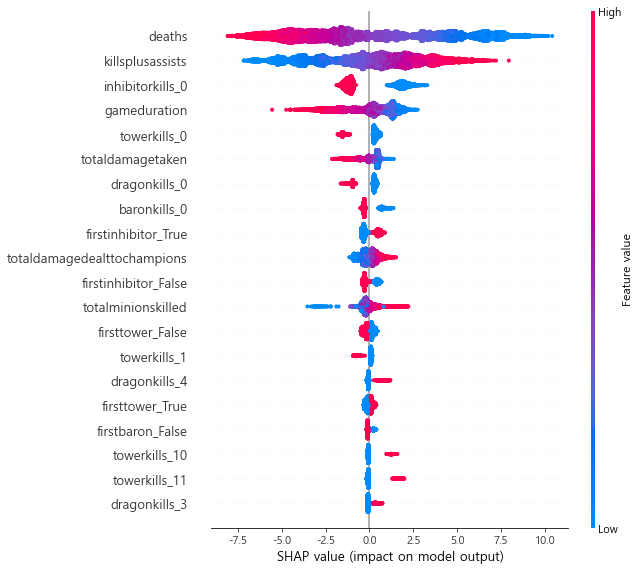

In [340]:
CBC=interpret_model(CBC)

<!-- => 
승리팀의 첫용을 차지한 비율 -> 0.633

승리팀의 첫 억제기을 부순 비율 -> 0.719

승리팀의 첫 전령을 부순 비율 -> 0.633

승리팀의 포블 비율 -> 0.633

승리팀의 퍼블 비율 -> 0.604

승리팀의 블루진영 비율 -> 0.512

승리팀의 레드진영 비율 -> 0.488 -->

In [321]:
# df.to_csv('./data_df.csv',encoding='utf-8-sig')